In [1]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

In [2]:
# Load data from a CSV file into pandas DataFrame
df = pd.read_csv('tokopediarating.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5522d10e-e7f8-41eb-a31f-704f592fb704,Ade Yovana Sari,https://play-lh.googleusercontent.com/a-/ACB-R...,"Gratis ongkir sangat tidak sesuai, biaya tamba...",1,196,3.217,2023-05-13 12:26:48,"Halo Toppers, terima kasih atas rating yang ka...",2023-05-13 13:04:05,3.217
1,dfadd18c-6175-42cb-bd2a-b0b5c8833b59,Dessy Wulandari Eka Putri,https://play-lh.googleusercontent.com/a-/ACB-R...,Zonk. Aplikasi nya ok tapi saya yang belum per...,1,594,3.217,2023-05-10 14:06:24,"Hai Kak Dessy , mohon maaf atas kendala yang K...",2022-09-21 04:37:56,3.217
2,bdd45c5c-45df-4526-bbd6-e313e4bdb046,Diva Farah Lumaya Sabina,https://play-lh.googleusercontent.com/a-/ACB-R...,"Saat checkout barang, total keseluruhan belanj...",3,67,3.217,2023-05-12 14:29:33,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2023-05-12 15:04:28,3.217
3,5f0d32d9-94f1-45d6-bdb0-059bd5e58376,Nevil Burn,https://play-lh.googleusercontent.com/a-/ACB-R...,Kenapa tokopedia masih menggunakan jasa sicepe...,1,8,3.215,2023-05-14 16:59:06,"Halo Toppers, terima kasih atas rating yang ka...",2022-10-31 15:37:12,3.215
4,14d5c516-4a9a-4487-8096-86fc2e0552aa,Eddy Susanto,https://play-lh.googleusercontent.com/a-/ACB-R...,Sekarang ada biaya layanan sama biaya jasa apl...,3,206,3.217,2023-05-07 14:00:17,"Makasih ratingnya, Toppers. Ke depannya kami a...",2023-05-07 14:24:08,3.217


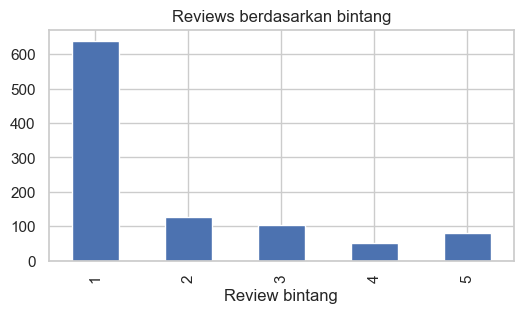

In [3]:
#Quick EDA
ax = df['score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Reviews berdasarkan bintang',
          figsize=(6, 3))
ax.set_xlabel('Review bintang')
plt.show()

In [4]:
# Some functions for preprocessing text

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [5]:
# Preprocessing tweets data

df['text_clean'] = df['content'].apply(cleaningText)
df['text_clean'] = df['text_clean'].apply(casefoldingText)
df.drop(['content'], axis = 1, inplace = True)

df['text_preprocessed'] = df['text_clean'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams tweets
df.drop_duplicates(subset = 'text_clean', inplace = True)

In [6]:
# Export to csv file
df.to_csv(r'tokopediasentimen_clean.csv', index = False, header = True,index_label=None)

df.head()

,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_preprocessed
0,5522d10e-e7f8-41eb-a31f-704f592fb704,Ade Yovana Sari,https://play-lh.googleusercontent.com/a-/ACB-R...,1,196,3.217,2023-05-13 12:26:48,"Halo Toppers, terima kasih atas rating yang ka...",2023-05-13 13:04:05,3.217,gratis ongkir sangat tidak sesuai biaya tambah...,"[gratis, ongkir, sesuai, biaya, kirim, bayar, ..."
1,dfadd18c-6175-42cb-bd2a-b0b5c8833b59,Dessy Wulandari Eka Putri,https://play-lh.googleusercontent.com/a-/ACB-R...,1,594,3.217,2023-05-10 14:06:24,"Hai Kak Dessy , mohon maaf atas kendala yang K...",2022-09-21 04:37:56,3.217,zonk aplikasi nya ok tapi saya yang belum pern...,"[zonk, aplikasi, nya, ok, transaksi, token, li..."
2,bdd45c5c-45df-4526-bbd6-e313e4bdb046,Diva Farah Lumaya Sabina,https://play-lh.googleusercontent.com/a-/ACB-R...,3,67,3.217,2023-05-12 14:29:33,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2023-05-12 15:04:28,3.217,saat checkout barang total keseluruhan belanja...,"[checkout, barang, total, belanja, langsung, d..."
3,5f0d32d9-94f1-45d6-bdb0-059bd5e58376,Nevil Burn,https://play-lh.googleusercontent.com/a-/ACB-R...,1,8,3.215,2023-05-14 16:59:06,"Halo Toppers, terima kasih atas rating yang ka...",2022-10-31 15:37:12,3.215,kenapa tokopedia masih menggunakan jasa sicepe...,"[tokopedia, jasa, sicepet, gratis, ongkir, si,..."
4,14d5c516-4a9a-4487-8096-86fc2e0552aa,Eddy Susanto,https://play-lh.googleusercontent.com/a-/ACB-R...,3,206,3.217,2023-05-07 14:00:17,"Makasih ratingnya, Toppers. Ke depannya kami a...",2023-05-07 14:24:08,3.217,sekarang ada biaya layanan sama biaya jasa apl...,"[biaya, layan, biaya, jasa, aplikasi, nilai, t..."


In [7]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [15]:
# Results from determine sentiment polarity of tweets

results = df['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['sentimen_score'] = results[0]
df['sentimen'] = results[1]
print(df['sentimen'].value_counts())

# Export to csv file
df.to_csv(r'tokopedia_data_clean_sentimen.csv', index = False, header = True,index_label=None)

df.head()

sentimen
negative    588
positive    377
neutral      35
Name: count, dtype: int64


,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_preprocessed,sentimen_score,sentimen
0,5522d10e-e7f8-41eb-a31f-704f592fb704,Ade Yovana Sari,https://play-lh.googleusercontent.com/a-/ACB-R...,1,196,3.217,2023-05-13 12:26:48,"Halo Toppers, terima kasih atas rating yang ka...",2023-05-13 13:04:05,3.217,gratis ongkir sangat tidak sesuai biaya tambah...,"[gratis, ongkir, sesuai, biaya, kirim, bayar, ...",13,positive
1,dfadd18c-6175-42cb-bd2a-b0b5c8833b59,Dessy Wulandari Eka Putri,https://play-lh.googleusercontent.com/a-/ACB-R...,1,594,3.217,2023-05-10 14:06:24,"Hai Kak Dessy , mohon maaf atas kendala yang K...",2022-09-21 04:37:56,3.217,zonk aplikasi nya ok tapi saya yang belum pern...,"[zonk, aplikasi, nya, ok, transaksi, token, li...",25,positive
2,bdd45c5c-45df-4526-bbd6-e313e4bdb046,Diva Farah Lumaya Sabina,https://play-lh.googleusercontent.com/a-/ACB-R...,3,67,3.217,2023-05-12 14:29:33,"Makasih atas ratingnya, Toppers. Jika kamu mem...",2023-05-12 15:04:28,3.217,saat checkout barang total keseluruhan belanja...,"[checkout, barang, total, belanja, langsung, d...",-11,negative
3,5f0d32d9-94f1-45d6-bdb0-059bd5e58376,Nevil Burn,https://play-lh.googleusercontent.com/a-/ACB-R...,1,8,3.215,2023-05-14 16:59:06,"Halo Toppers, terima kasih atas rating yang ka...",2022-10-31 15:37:12,3.215,kenapa tokopedia masih menggunakan jasa sicepe...,"[tokopedia, jasa, sicepet, gratis, ongkir, si,...",11,positive
4,14d5c516-4a9a-4487-8096-86fc2e0552aa,Eddy Susanto,https://play-lh.googleusercontent.com/a-/ACB-R...,3,206,3.217,2023-05-07 14:00:17,"Makasih ratingnya, Toppers. Ke depannya kami a...",2023-05-07 14:24:08,3.217,sekarang ada biaya layanan sama biaya jasa apl...,"[biaya, layan, biaya, jasa, aplikasi, nilai, t...",7,positive


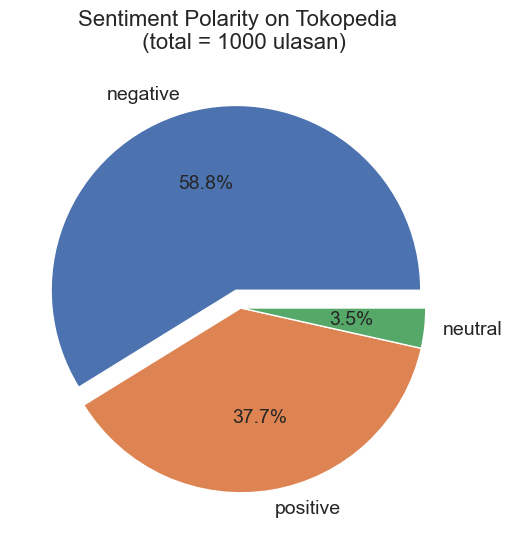

In [17]:
#Visual
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df['sentimen'].value_counts()]
labels = list(df['sentimen'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tokopedia \n (total = 1000 ulasan)', fontsize = 16, pad = 20)
plt.show()

In [19]:
#Top 10 Ulasan Positif
pd.set_option('display.max_colwidth', 3000)
positive = df[df['sentimen'] == 'positive']
positive = df[['text_clean', 'sentimen_score', 'sentimen','score']].sort_values(by = 'sentimen_score', ascending=False).reset_index(drop = True)
positive.index += 1
positive[0:10]

,text_clean,sentimen_score,sentimen,score
1,tolong minta tambahkan no telp pada jasa pengirim paket karna di status pengiriman terkirim tapi kadang barang belum diterima supaya konsumen bisa langsung menanyakan paket ke jasa pengirim langsung,36,positive,5
2,ntah mau bilang apalagi terimakasih bnyak apalagi untuk cs nya padahal pas kemarin rabu saya chat jm pagi ternyata sudah fast respon banget apalagi mau urus ini itu karena lagi ada masalah sama akunya saya dan cs nya tuh udahmah fast respon ditambah lagi sabar dan ramah terimakasih banyak tokopedia dan sukses selalu 😄,34,positive,5
3,mohon aplikasi di update nomor resi tidak ada nomor contoh saya belanja jenisitem produk di tokopedia tidak ada nomor voucher gratis ongkir sekarang semakin dikit jasa kirim requler yang gratis ongkir tolong di ahlikan ke jt dong jasa antar aja lama ditambah jasa sicepat pengiriman sekarang sangat lama dan sering an paket asal taro asal foto terimakasih tokopedia,34,positive,4
4,sejauh ini belanja di tokped lancar² saja banyak promo cashback gratis ongkir jasa pengiriman yg cepat tapi semenjak kebijakan baru muncul jdi kurang nyaman terutama ada biaya tambahan transaksi layanan kuota gratis ongkir jadi berkurang tidak bisa menggunakan voucher cashback gratis ongkir secara bersamaan kalau terus menerus seperti ini tidak menutup kemungkinan para pelanggan setia tokped beralih ke ecommerce yg lain mohon lebih dibenahi lagi kebijakannya trims,30,positive,2
5,ecommerce paling ampas saat ini terutama untuk urusan gratis ongkirnya contoh untuk saya yg tinggal di kalimantan ongkir reguler rb dulu full gratis ongkir sekarang gratis ongkirnya senilai rb fine aja gak masalah yg jadi masalah itu gratis ongkir dalam bentuk voucher tapi voucher gak jelas juga karena ketika milih kurir reguler lalu memasukkan voucher ongkir maka otomatis kurir ganti menjadi ekonomi jd intinya untuk kalimantan potongan ongkir hanya berlaku untuk ekonominajis,28,positive,1
6,dulu jualan disini baik saja tanpa ada kendala sedikitpun sekarang saldo penjualan toko saya malah status review saya selaku penjual merasa sangat kecewa dengan kendala seperti ini kami memutar otak agar bisa berkembang disini tapi tokopedia semenamena menahan dana hasil jualan akhirnya saya kesulitan untuk memutar modal kembali tokopedia care bisa apa katanya demi kenyamanan kenyamanan seperti apa ini membuat saya merasa sangat tidak nyaman berjualan disini,25,positive,1
7,zonk aplikasi nya ok tapi saya yang belum pernah transaksi token listrik ketika transaksi pertama tidak bisa menggunakan promo yg ada katanya sudah pernah dipakaibiaya penangganan dan biaya jasa tapi pelayanan zonk cashback yg jarang ada dan seringnya ketika ada cashback tidak masuk ketika transaksi selesai ngapain bilang ada cashback kalo ternyata zonk harusnya bisa ada review untuk jasa ekspedisi bukan cuma toko dan barang buruk sekali tidak berkembang malah mundur mutunya,25,positive,1
8,saran dan masukan supaya pelanggan menjadi puas dan senang tolong ditingkatkan lagi kualitas produk dan harganya yg terjangkau juga kalau bisa perbanyak diskon dan gratis ongkirnya makasih,24,positive,4
9,terimakasih ternyata penilaian saya salah toped begitu tanggap atas keluhan para pelanggan terimakasih kasih sekali lagi karena saya sudah mendapatkan solusi terbaik 🙏🙏,22,positive,5
10,sangat kecewa sih sama kebijakan tokopedia sekarang pas di halaman produk ongkirnya murah ntar pas udah mau cekout ongkirnya jadi nambah belum lagi biaya penanganan kalau cod nambah lagi biaya cod padahal dulu tokped menurut saya itu market place terbaik tapi sekarang kenapa gini dulu pengiriman juga cepat sekarang lambat banget bisa memakan waktu minggu dulu pas gratis ongkir cuma harian sekarang ongkir nya gak ngotak,22,positive,1


In [20]:
#Top 10 Ulasan negatif
pd.set_option('display.max_colwidth', 3000)
negative = df[df['sentimen'] == 'negative']
negative= df[['text_clean', 'sentimen_score', 'sentimen','score']].sort_values(by = 'sentimen_score', ascending=True)[0:10].reset_index(drop = True)
negative.index += 1
negative[0:10]

,text_clean,sentimen_score,sentimen,score
1,quick review jujur ini apk enteng di luar berat di dalem cuman tokped yang buat hp hang bisa berimbas ke ui karena masih butuh ya pake dahh sering crash apknya untuk tampilannya sendiri agak ribet dan kesannya sempit kebanyakan fitur ndak tau navigasinya estimasi mempelajari ini apk sekitar menit untuk promo cukup gratis ongkir yang ngebantu banget sisanya kayak gopay coins ndak terlalu butuh bagiku ada yg hrg miring juga keseluruhan layak ndak layak masih banyak prnya,-49,negative,3
2,sangat mengecewakanrugi download aplikasi toko pedia tidak bisa cod bayar di tempatcapek buang buang lebih baik unnistall saja percuma aplikasi toko pedia gak berguna tidak ada sistem pembayaran cod bayar di tempat 🤦‍♂️🤦‍♂️🤦‍♂️coba bikin sistem cod bayar di tempat karna semua produk barang di toko pediamenggunakan virtual account tidak ada sistem cod bayar di tempat payah kalah dengan shopee dan lazadasistem cod bayar di tempat,-43,negative,1
3,ini suami istri gk boleh belanja kirim ke alamat yg sama ya padahal nama beda rekening beda belanja juga beda suami beli apa istri beli apa uda gitu jarang belanja coba cek aja tokopedia mana kena syarat ketentuan mending tokopedia gk usa buat promo kaya hadiahnya gede aja dapatnya aja cuma perak atau seribu perak aja ribet setengah mampus satu lagi kasus barang w ilang ini juga belum diganti tokopedia sampai skrg tolong dunk tanggung jawab jangan digantung tokopedia skrg kacau,-42,negative,1
4,aplikasi ga jelas tiap mau beli selalu gagal mana udah transfer lagi mau refund ga bisa karena ada ketentuan minimal nominalnya dan ini bukan pertama kalinya saya gagal beli di tokped aplikasi anak negri tapi menyengsarakan anak negri mending belanja di shopee atau di tiktok shop kapok gw sama nih aplikasi dan ini terakhir kali gw download nih aplikasi by 🤮🤮🤮,-42,negative,1
5,makin jelek aja tokopedia tibatiba pembatalan belanjaan barang tanpa pemberitahuan alasan prosedur sudah sesuai tapi di batalkan ga jelas makin parah aja barang mau di pakai mendekati hari jadi ga jadi wajar pada pindah ke aplikasi sebelah,-41,negative,1
6,fasilitas gopaylater cicilnya malah ilang kagak salah nih padahal kita belanja jadi lebih enak dan mudah sekarang ya males aja belanja kalau fasilitas cicilnya ilang tahu khan dampaknya saham kalian terjun bebas di bursa ya udah bye bye pakai toped mending pindah shopee aja murah cicilan mudah,-37,negative,1
7,aplikasi yang sangat merugikan penjual tokopedia kini memihak kepada pelaku curang jual beli barang bekas tim resolusi nya tidak memberikan solusi yg bijak brg jelas² dikirim dlm keadaan baik eh tiba dipembeli rusak yg ada penjual dimintai bukti sedangkan pembeli tidak diharus melampirkan bukti unboxing paket yg di press penjualnya jelas² barang dikirim baterainya full sampai dipembeli baterai lowbet sdh rugi ongkirbrg rusak transaksi terpending minggu tim tokopedia paraaaahh,-35,negative,1
8,payah ni tokopedia pantesan bini gw bilang tokped tu mau retur aja ribet sistemnya knp ga se simple market place sebelah kayanya gw jg mau hijrah k aplikasi sebelah mau d sampein kmn boss nanya jg kaga d bales toped care linknya ribet benerga kaya d sebelah aplikasi lgsg bisa chat lgsg ke csnya,-33,negative,1
9,aplikasi lucungajuin pinjaman az belum ko pemberitahuan nya pengajuan di tolak yg ada aplikasi lo gw talak menuh menuhin memori gw az hapus data gw yg masuk jangan ampe di salah gunain buat yg ngga,-33,negative,1
10,pertahankan terus aplikasi 👍🏻👍🏻 dan kalo bisa tolong jangan sampai ada fitur video² gitu soalnya saya males banget aplikasi belanja tapi malah kek tiktok kek aplikasi toko online di sebelah server ga stabil aplikasi delay pake aplikasi² video gajelas,-33,negative,5


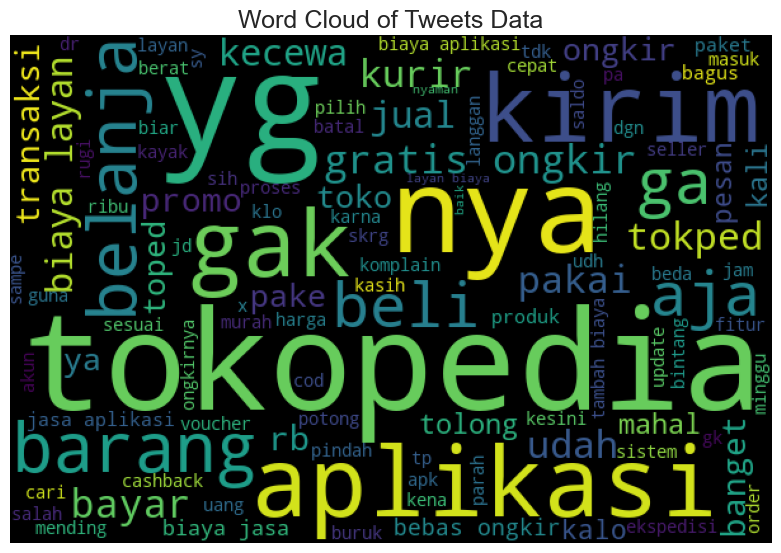

In [23]:
# Visualize word cloud

list_words=''
for tweet in df['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)
        
wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [24]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

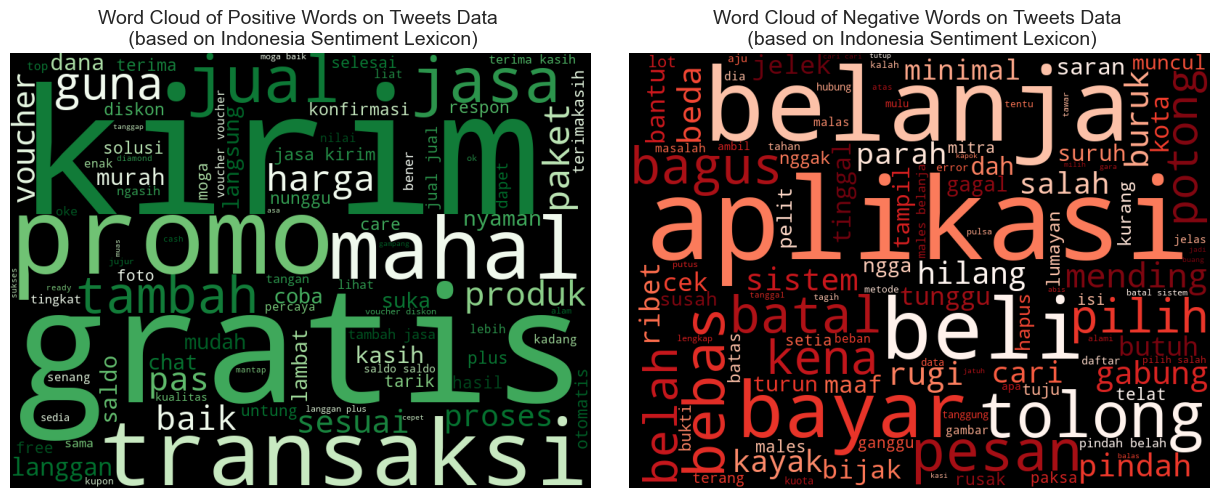

In [25]:
# Visualize positive and negative word cloud

sentiment_words = df['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()